FIFA WORLDCUP ANALYSIS (1930-2014)

In [1]:
## importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import plotly as py

In [2]:
## importing data set
d1 = pd.read_csv('WorldCupMatches.csv')
d2 = pd.read_csv('WorldCupPlayers.csv')
d3 = pd.read_csv('WorldCups.csv')

In [3]:
d1.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4,1,Mexico,,4444.0,3,0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201,1096,FRA,MEX
1,1930,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3,0,Belgium,,18346.0,2,0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201,1090,USA,BEL
2,1930,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2,1,Brazil,,24059.0,2,0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201,1093,YUG,BRA
3,1930,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3,1,Peru,,2549.0,1,0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201,1098,ROU,PER
4,1930,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1,0,France,,23409.0,0,0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201,1085,ARG,FRA


In [4]:
d2.head()

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70'
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN,NaN


In [5]:
d3.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607


In [6]:
d1.isnull().sum()

Year                    0
Datetime                0
Stage                   0
Stadium                 0
City                    0
Home Team Name          0
Home Team Goals         0
Away Team Goals         0
Away Team Name          0
Win conditions          0
Attendance              2
Half-time Home Goals    0
Half-time Away Goals    0
Referee                 0
Assistant 1             0
Assistant 2             0
RoundID                 0
MatchID                 0
Home Team Initials      0
Away Team Initials      0
dtype: int64

In [7]:
d1 = d1.dropna()

In [8]:
d2.isnull().sum()

RoundID              0
MatchID              0
Team Initials        0
Coach Name           0
Line-up              0
Shirt Number         0
Player Name          0
Position         33641
Event            28715
dtype: int64

In [9]:
d2 = d2.drop(['Position', 'Event'], axis = 1)

In [10]:
d3.isnull().sum()

Year              0
Country           0
Winner            0
Runners-Up        0
Third             0
Fourth            0
GoalsScored       0
QualifiedTeams    0
MatchesPlayed     0
Attendance        0
dtype: int64

In [11]:
win = []
for i in d1.values:
  if i[6] > i[7]:
    win.append(i[5])
  else:
    win.append(i[8])

In [12]:
d1['Teamwon'] = win

In [13]:
d1.columns

Index(['Year', 'Datetime', 'Stage', 'Stadium', 'City', 'Home Team Name',
       'Home Team Goals', 'Away Team Goals', 'Away Team Name',
       'Win conditions', 'Attendance', 'Half-time Home Goals',
       'Half-time Away Goals', 'Referee', 'Assistant 1', 'Assistant 2',
       'RoundID', 'MatchID', 'Home Team Initials', 'Away Team Initials',
       'Teamwon'],
      dtype='object')

In [23]:
c = pd.DataFrame(d3)
c.replace('Germany FR','Germany',inplace = True)
print(c)

    Year       Country     Winner      Runners-Up        Third  \
0   1930       Uruguay    Uruguay       Argentina          USA   
1   1934         Italy      Italy  Czechoslovakia      Germany   
2   1938        France      Italy         Hungary       Brazil   
3   1950        Brazil    Uruguay          Brazil       Sweden   
4   1954   Switzerland    Germany         Hungary      Austria   
5   1958        Sweden     Brazil          Sweden       France   
6   1962         Chile     Brazil  Czechoslovakia        Chile   
7   1966       England    England         Germany     Portugal   
8   1970        Mexico     Brazil           Italy      Germany   
9   1974       Germany    Germany     Netherlands       Poland   
10  1978     Argentina  Argentina     Netherlands       Brazil   
11  1982         Spain      Italy         Germany       Poland   
12  1986        Mexico  Argentina         Germany       France   
13  1990         Italy    Germany       Argentina        Italy   
14  1994  

In [27]:
## count of wining teams
w = c['Winner'].value_counts()

In [32]:
df = pd.DataFrame(w).reset_index()

In [29]:
df

,Winner,count
0,Brazil,5
1,Italy,4
2,Germany,4
3,Uruguay,2
4,Argentina,2
5,England,1
6,France,1
7,Spain,1


<Axes: title={'center': 'Title Winner'}, xlabel='Country'>

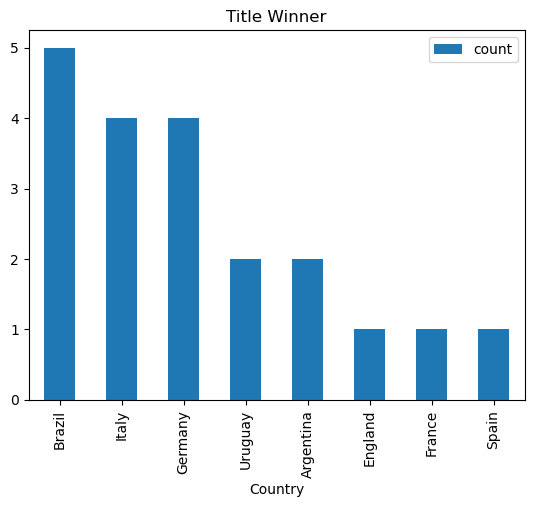

In [33]:
df.plot(kind = 'bar',x = 'Winner',y = 'count',xlabel='Country',title = 'Title Winner')

In [34]:
## counts of runner team
d = c['Runners-Up'].value_counts()
df = pd.DataFrame(d).reset_index()
df

,Runners-Up,count
0,Germany,4
1,Argentina,3
2,Netherlands,3
3,Czechoslovakia,2
4,Hungary,2
5,Brazil,2
6,Italy,2
7,Sweden,1
8,France,1


<Axes: title={'center': 'Runners'}, xlabel='Country'>

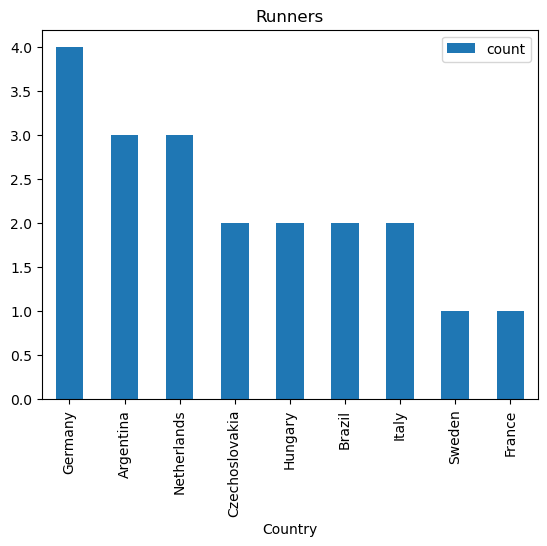

In [35]:
df.plot(kind = 'bar',x = 'Runners-Up',y = 'count',xlabel='Country',title = 'Runners')

In [37]:
## count of third place
t = c['Third'].value_counts()
df = pd.DataFrame(t).reset_index()
df

,Third,count
0,Germany,4
1,Brazil,2
2,Sweden,2
3,France,2
4,Poland,2
5,USA,1
6,Austria,1
7,Chile,1
8,Portugal,1
9,Italy,1


<Axes: title={'center': 'Third place'}, xlabel='Country'>

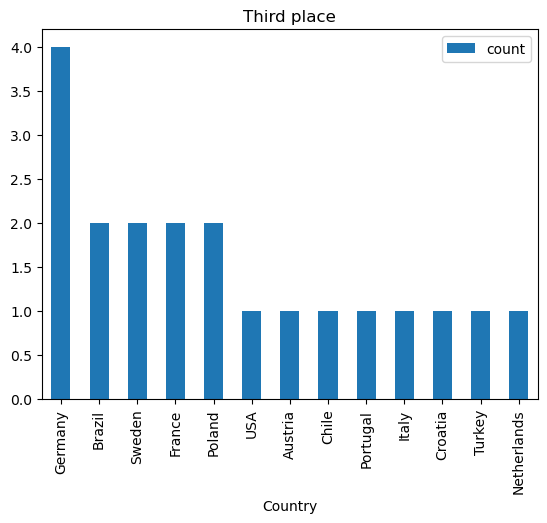

In [38]:
df.plot(kind = 'bar',x = 'Third',y = 'count',xlabel='Country',title = 'Third place')

In [39]:
## goals by teams
df = pd.DataFrame(c.groupby('Country').sum()['GoalsScored'])
df.sort_values(by = 'GoalsScored', ascending = False)

,GoalsScored
Country,
Brazil,259
France,255
Germany,244
Mexico,227
Italy,185
Korea/Japan,161
Spain,146
South Africa,145
USA,141


<Axes: title={'center': 'Total Number of goals'}, xlabel='Country'>

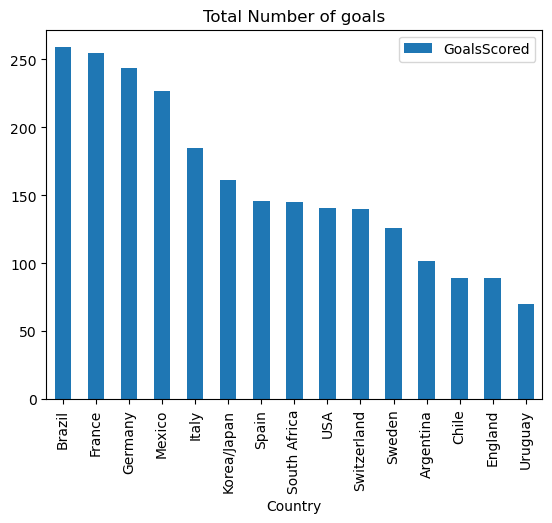

In [40]:
g = df.sort_values(by = 'GoalsScored',ascending = False)
g.plot(kind = 'bar',title = 'Total Number of goals',)

In [41]:
c

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany,Hungary,Austria,Uruguay,140,16,26,768.607
5,1958,Sweden,Brazil,Sweden,France,Germany,126,16,35,819.810
6,1962,Chile,Brazil,Czechoslovakia,Chile,Yugoslavia,89,16,32,893.172
7,1966,England,England,Germany,Portugal,Soviet Union,89,16,32,1.563.135
8,1970,Mexico,Brazil,Italy,Germany,Uruguay,95,16,32,1.603.975
9,1974,Germany,Germany,Netherlands,Poland,Brazil,97,16,38,1.865.753


Text(0.5, 1.0, 'Qualified Teams Per Year')

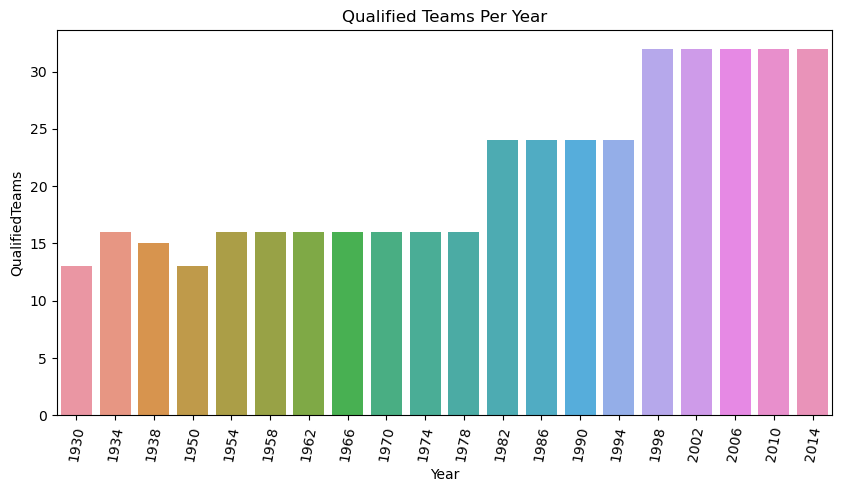

In [44]:
## Teams qualified
fig, ax = plt.subplots(figsize = (10,5))
qt = sb.barplot(x = 'Year', y = 'QualifiedTeams', data = c)
qt.set_xticklabels(qt.get_xticklabels(), rotation = 80)
qt.set_title('Qualified Teams Per Year')

Text(0.5, 1.0, 'Match Played Per Year')

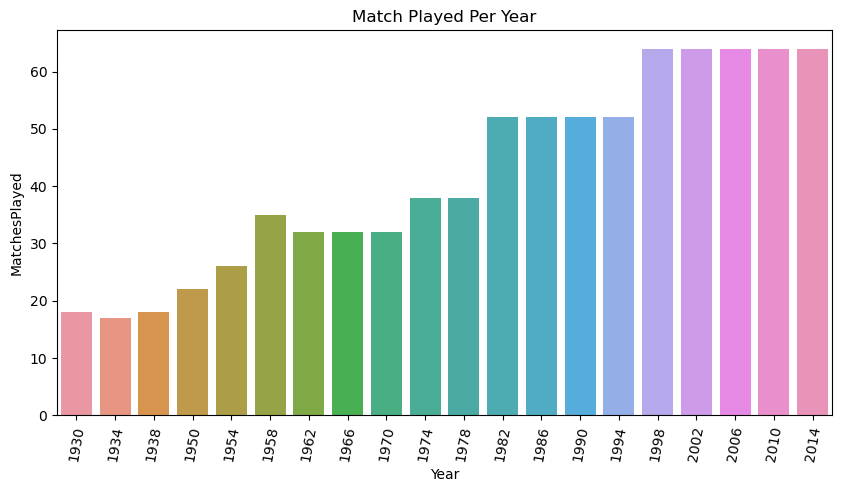

In [45]:
## Matches Played
fig, ax = plt.subplots(figsize = (10,5))
mp = sb.barplot(x = 'Year', y = 'MatchesPlayed', data = c)
mp.set_xticklabels(mp.get_xticklabels(), rotation = 80)
mp.set_title('Match Played Per Year')

In [47]:
## Stadiums
st = pd.DataFrame(d1.groupby('Stadium')['Stadium'].count()).rename(columns = {'Stadium':'no of matches'})
st = st.sort_values(by ='no of matches', ascending = False)
st.head(10)

,no of matches
Stadium,
Estadio Azteca,19
Olympiastadion,14
Jalisco,14
Nou Camp - Estadio Leon,11
Nacional,10
Estadio Centenario,10
Estadio do Maracana,10
Estadio Nacional,10
Wembley Stadium,9


<Axes: xlabel='Stadium'>

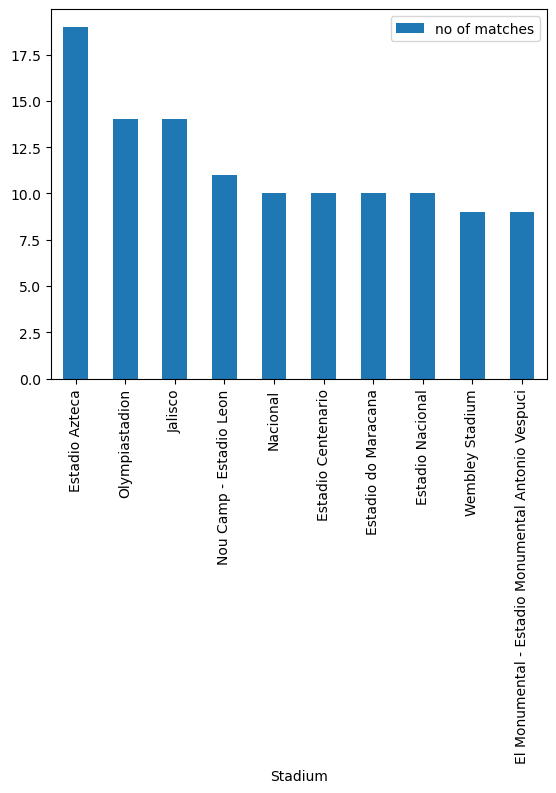

In [48]:
st[:10].plot(kind = 'bar')

In [51]:
## Top 10 teams with home team goals
df1 = pd.DataFrame(d1.groupby( 'Home Team Name')['Home Team Goals'].sum())
df1 = df1.sort_values(by = 'Home Team Goals', ascending = False).head(10)
df1

,Home Team Goals
Home Team Name,
Brazil,180
Germany,167
Argentina,111
Italy,99
Hungary,73
France,68
Uruguay,62
England,54
Sweden,53


<Axes: xlabel='Home Team Name'>

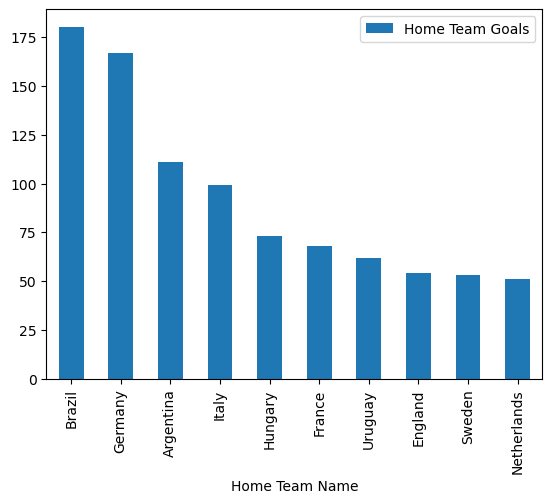

In [52]:
df1.plot(kind = 'bar')

In [53]:
## Top 10 teams with Away team goal
df2 = pd.DataFrame(d1.groupby( 'Away Team Name')['Away Team Goals'].sum())
df2 = df2.sort_values(by = 'Away Team Goals', ascending = False).head(10)
df2

,Away Team Goals
Away Team Name,
Brazil,45
Spain,42
France,40
Netherlands,40
Mexico,36
Germany,35
Germany FR,32
Italy,29
Belgium,27


<Axes: xlabel='Away Team Name'>

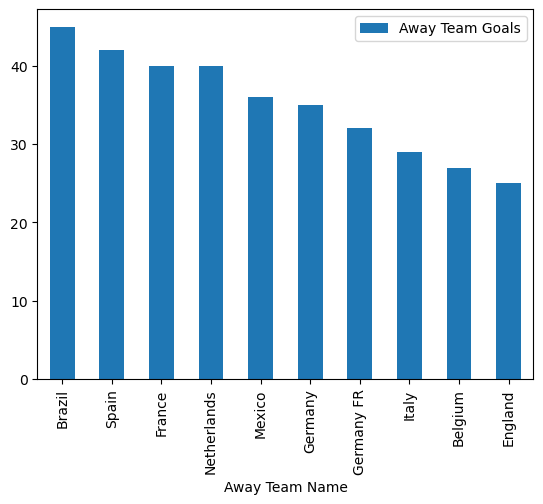

In [54]:
df2.plot(kind = 'bar')

In [56]:
## To 10 teams maximum Wining count
df3 = pd.DataFrame(d1.groupby(['Year','Teamwon'])['Teamwon'].count()).rename(columns = {'Teamwon': 'win_count'})
df3 = df3.reset_index()

In [57]:
df3 = pd.DataFrame(df3.groupby('Teamwon')['win_count'].sum()).sort_values(by = 'win_count',ascending = False)
df3 = df3.head(10)
df3

,win_count
Teamwon,
Brazil,75
Germany,64
Argentina,54
Italy,52
France,35
England,35
Spain,34
Netherlands,33
Uruguay,25


<Axes: xlabel='Teamwon'>

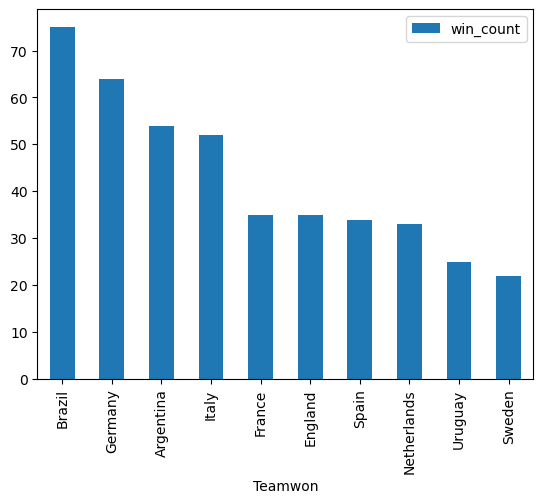

In [58]:
df3.plot(kind = 'bar')

In [59]:
## Half time goals
ht1 = pd.DataFrame(d1.groupby('Home Team Name')['Half-time Home Goals'].sum()).sort_values(by = 'Half-time Home Goals', ascending = False).reset_index()
ht1 = ht1.rename(columns ={'Home Team Name' : 'team_name'})

In [60]:
ht2 = pd.DataFrame(d1.groupby('Away Team Name')['Half-time Away Goals'].sum()).sort_values(by = 'Half-time Away Goals', ascending = False).reset_index()
ht2 = ht2.rename(columns ={'Away Team Name' : 'team_name'})

In [61]:
ht3 = pd.merge(ht1, ht2, on='team_name', how='outer')
ht3['Tot_half-Time_Goals'] = ht3['Half-time Home Goals'] + ht3['Half-time Away Goals']
ht3 = ht3.head(10)
ht3

,team_name,Half-time Home Goals,Half-time Away Goals,Tot_half-Time_Goals
0,Germany,66.0,18.0,84.0
1,Brazil,66.0,17.0,83.0
2,Argentina,48.0,8.0,56.0
3,Italy,36.0,13.0,49.0
4,Hungary,33.0,7.0,40.0
5,Uruguay,27.0,6.0,33.0
6,France,25.0,17.0,42.0
7,Sweden,23.0,10.0,33.0
8,England,20.0,11.0,31.0
9,Netherlands,19.0,18.0,37.0


<Axes: title={'center': 'teams with most no of goals in Half-Time'}, xlabel='team_name'>

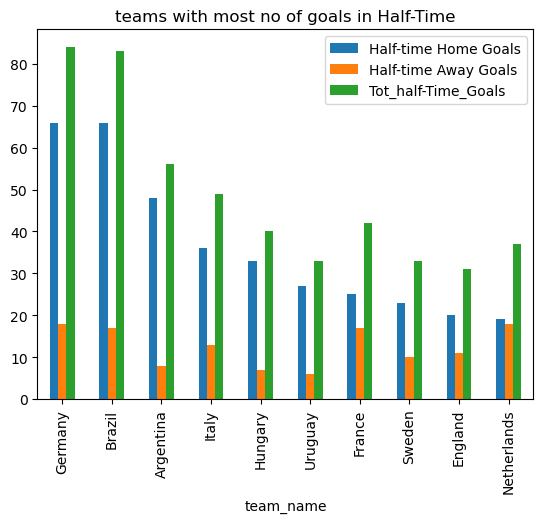

In [62]:
ht3.plot(kind = 'bar',xlabel = 'team_name',x = 'team_name', title = 'teams with most no of goals in Half-Time' )

Observations:

Brazil has Won the World Cup more number of times. It has won 5 times.England, France and Spain won only 1 time each.
Germany has grasped the runner title for 4 number of times
The third place title also grabed by germany for 4 times
Brazil team has scored more number of goals among all other teams, it has scored 259 goals in total.
From 1998 to 2014 more number of teams hasbeen qualified.It seems the players are more efficient in that time. Overall 32 teams were selected.
More number of matches were played between 1998 and 2014 and the overall count is 64.
Most of the matches were played in Estadio Azteca stadium followed by Maracan stadium.
Brazil scored the most number of Home Team goals totally 180 goals.
Germany scored the most number of Away Team goals totally 67 goals.
In FIFA WorldCup series Brazil has won most of the matches, It has won almost 75 matches. It seems to be an extraordinary team with efficient players.
Brazil and Germany scored more number of Halftime goals in their home ground.Germany has scored more halftime as a Away team and in total 96 goals.
Among all above observations Brazilteam is highly efficient and Germany team is growing team other teams also giving tough to them to keep up their positions.